# 多項式回帰

単純な線形回帰(単回帰)は特徴量に定数をかけたため、グラフが直線であり、うまく予測値にフィッティングしません。

そのため、特徴量の組み合わせを増やす手法が提案され、それが多項式回帰になります。

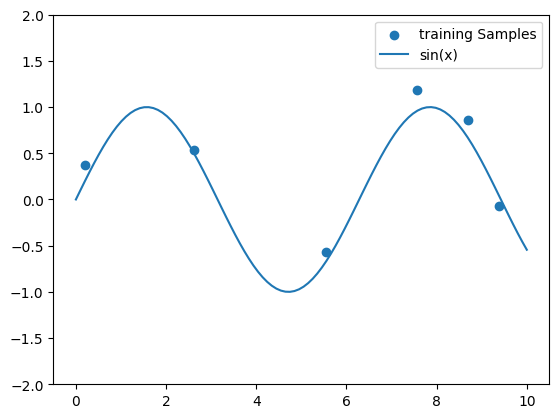

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# 訓練用データの数
NUM_TR = 6
np.random.seed(0)
rng = np.random.RandomState(0)

# 描画用のx軸データ
x_plot = np.linspace(0,10,100)
# 訓練データ
tmp = copy.deepcopy(x_plot)
rng.shuffle(tmp)
x_tr = np.sort(tmp[:NUM_TR])
y_tr = np.sin(x_tr) + 0.1*np.random.randn(NUM_TR) 

plt.scatter(x_tr,y_tr,label="training Samples")
plt.plot(x_plot, np.sin(x_plot), label=f"sin(x)")
plt.legend()
plt.ylim(-2,2)
plt.show()


今回は、手動で訓練データを作成しました。

訓練データは、y = sin(x) に、N(0,1)*0.1の誤差を乗せたデータになります。

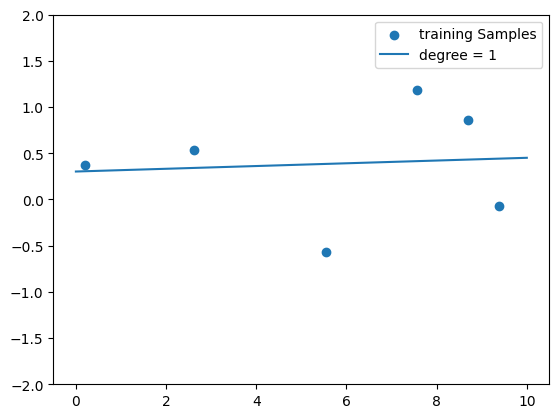

In [2]:
# Matrixへ変換
X_tr = x_tr.reshape(-1,1)
X_plot = x_plot.reshape(-1,1)

# 多項式用のデータ
# 次数決め打ち
degree = 1
pf = PF(degree=degree)
X_poly = pf.fit_transform(X_tr)
X_plot_poly = pf.fit_transform(X_plot)

model = linear_model.LinearRegression()
model.fit(X_poly,y_tr)

plt.scatter(x_tr,y_tr,label="training Samples")
plt.plot(x_plot,model.predict(X_plot_poly),label=f"degree = {degree}")
plt.legend()
plt.ylim(-2,2)
plt.show()

特徴量の1次回帰では、今まで通りの直線になります。

degree = 1 mse = 0.33075005001856256
degree = 2 mse = 0.3252271169458752
degree = 3 mse = 0.3029003447481235
degree = 4 mse = 0.01008601841025451
degree = 5 mse = 2.184991109664755e-21


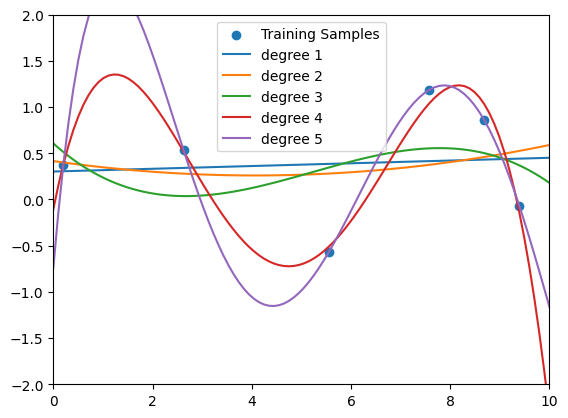

In [3]:
# 多項式用のデータ
# 全ての次数
plt.scatter(x_tr,y_tr,label="Training Samples")

for degree in range(1,NUM_TR):
    pf = PF(degree=degree)
    X_poly = pf.fit_transform(X_tr)
    X_plot_poly = pf.fit_transform(X_plot)
    model = linear_model.LinearRegression()
    model.fit(X_poly,y_tr)
    plt.plot(x_plot,model.predict(X_plot_poly),label=f"degree {degree}")
    plt.legend()
    mse = mean_squared_error(y_tr,model.predict(X_poly))
    print(f"degree = {degree} mse = {mse}")

plt.xlim(0,10)
plt.ylim(-2,2)
plt.show()

グラフからも分かるように、

多項式回帰の特徴は、次数を増やせば増やすほど、誤差が少なくなります。

しかし無駄に次数を増やすと、学習データに無理矢理近づいたようなモデルが生成され、

今度は逆に過学習の恐れがあります。